# Backscatter Tag Design for High Concurrency

In [1]:
from viterbi_decoding import *
from extract import ExtractPeaks

## Loading signal

In [2]:
# configuration
# --------------
snr = 20
tags = 15
# --------------
file = 'signals/tags%d_snr%d_db.mat' % (tags, snr)
ep = ExtractPeaks(filename=file, start=0, end=None)
# print("sigma \t %.4f" % ep.sigma)

## Edges extraction

E:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


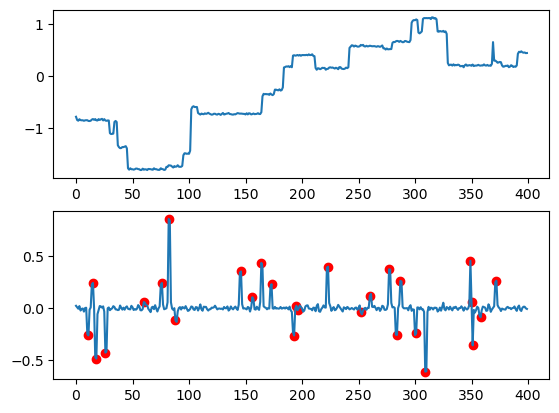

In [3]:
rx_signal = ep.extract(thres=0.15, duration=3)
ep.plotEdges(rx_signal, 400)

## Viterbi classification

In [4]:
alpha = 144 * ep.sigma ** 4
# print(alpha)

In [5]:
res = viterbi(rx_signal, alpha)
# leach out tags with small number
valid_class = filtering(rx_signal, res)
print("\nfiltered tags: %d" % len(valid_class))

Classifying...: 100%|██████████████████████████████████████████████████████████████| 1356/1356 [00:29<00:00, 45.90it/s]


filtered tags: 15


## Evaluation and visualization

### Plot density distribution

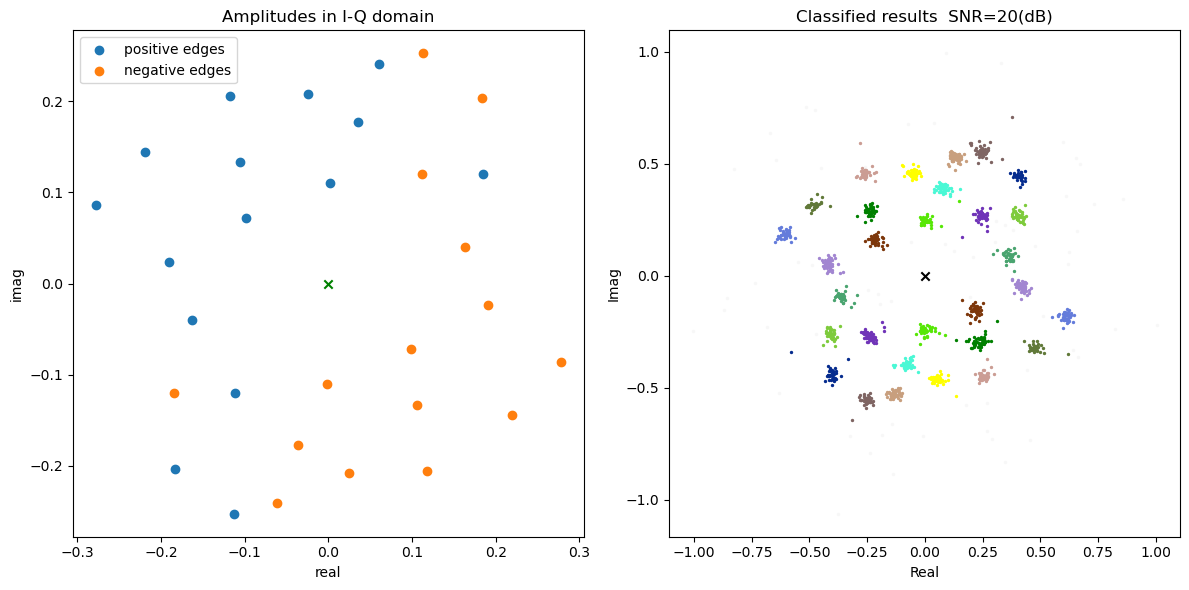

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ep.plotAmp(axes=axes[0])                        # comment this line for real signal
plotCDF(axes=axes[1], rx_signal=rx_signal, result_class=res, snr=snr)
fig.set_tight_layout('tight')
plt.show()
plt.close(fig)

### Quantitive measurement

In [7]:
# from delta n -> frequency for each tag in the path
freq, indices = get_freq(rx_signal, res)
# check whether the estimated frequency match the ground truth with tolerance = df
tags_match = freq_match(freq, ep.freq, df=80)
print(tags_match)
print('\n')
# given the matching relationship, check whether how many edges of tags in the ground truth have been detected
detected_num, edges_ratio = count_acc(tags_match, ep.extractRate(rx_signal, fs=1e+7), indices)
print(detected_num)
print(edges_ratio)

[[14], [10], [18], [12], [7], [19], [9], [13], [11], [4], [16], [3], [15], [20], [17]]


15
[0.98360656 1.140625   1.         1.         1.02631579 0.9125
 1.03571429 0.96590909 0.9673913  0.95833333 0.98989899 0.94230769
 0.95327103 0.91150442 0.9137931 ]


### Scalarize criterion

In [8]:
l = np.minimum(edges_ratio, np.maximum(5 - 4 * edges_ratio, 0))
print(np.average(l))

0.9125263482457681
